In [40]:
#Import necessary libraries:
import pandas as pd
import numpy
import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from pandas import read_csv
from matplotlib import pyplot as plt

In [29]:
from pandas import read_csv
filename = (r'C:\Users\moumi\Desktop\Busniess Analytucs\Sem 2\Machine learning\Marketing.csv')
dataset = read_csv(filename)
dataset

,gender,age,income,kids,ownHome
0,Male,47.316133,49482.81044,2,ownNo
1,Male,31.386839,35546.28830,1,ownYes
2,Male,43.200342,44169.18638,0,ownYes
3,Female,37.316995,81041.98639,1,ownNo
4,Female,40.954390,79353.01444,3,ownYes
...,...,...,...,...,...
295,Female,32.952269,43882.42561,0,ownYes
296,Female,40.962547,64197.08688,2,ownNo
297,Male,38.229804,47580.92678,0,ownNo
298,Male,33.170364,60747.33640,1,ownNo


In [30]:
#Check Null Values
dataset.isnull().sum()

gender     0
age        0
income     0
kids       0
ownHome    0
dtype: int64

In [31]:
dataset.loc[dataset['gender']=='Male',"Gender"] = 1
dataset.loc[dataset['gender']=='Female',"Gender"] = 0
dataset.loc[dataset['ownHome']=='ownYes',"Home"] = 1
dataset.loc[dataset['ownHome']=='ownNo',"Home"] = 0

In [32]:
df=dataset.drop(['gender','ownHome'],axis=1)

In [33]:
df

,age,income,kids,Gender,Home
0,47.316133,49482.81044,2,1.0,0.0
1,31.386839,35546.28830,1,1.0,1.0
2,43.200342,44169.18638,0,1.0,1.0
3,37.316995,81041.98639,1,0.0,0.0
4,40.954390,79353.01444,3,0.0,1.0
...,...,...,...,...,...
295,32.952269,43882.42561,0,0.0,1.0
296,40.962547,64197.08688,2,0.0,0.0
297,38.229804,47580.92678,0,1.0,0.0
298,33.170364,60747.33640,1,1.0,0.0


In [34]:
mms=MinMaxScaler()
mms.fit(df)
df_trans=mms.transform(df)

In [35]:
df_trans

array([[0.45823814, 0.45760445, 0.28571429, 1.        , 0.        ],
       [0.19806713, 0.34094336, 0.14285714, 1.        , 1.        ],
       [0.39101548, 0.41312469, 0.        , 1.        , 1.        ],
       ...,
       [0.30983235, 0.44168399, 0.        , 1.        , 0.        ],
       [0.2271972 , 0.55189856, 0.14285714, 1.        , 0.        ],
       [0.24701736, 0.49269624, 0.71428571, 1.        , 1.        ]])

In [37]:
dff=pd.DataFrame(df_trans, columns=['Age','Income','Kids','Gemder','Home'])

In [38]:
dff

,Age,Income,Kids,Gemder,Home
0,0.458238,0.457604,0.285714,1.0,0.0
1,0.198067,0.340943,0.142857,1.0,1.0
2,0.391015,0.413125,0.000000,1.0,1.0
3,0.294924,0.721783,0.142857,0.0,0.0
4,0.354333,0.707645,0.428571,0.0,1.0
...,...,...,...,...,...
295,0.223635,0.410724,0.000000,0.0,1.0
296,0.354466,0.580776,0.285714,0.0,0.0
297,0.309832,0.441684,0.000000,1.0,0.0
298,0.227197,0.551899,0.142857,1.0,0.0


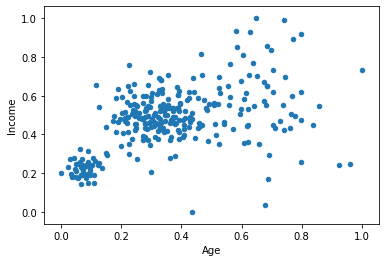

In [47]:
dff.plot(kind='scatter',x='Age',y='Income')
plt.show()

In [51]:
Sum_of_Squared_distances=[]
K=range(1,16)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(dff)
    Sum_of_Squared_distances.append(km.inertia_)

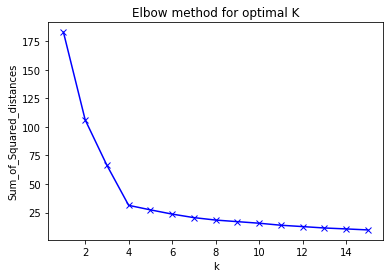

In [53]:
plt.plot(K,Sum_of_Squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_Squared_distances')
plt.title('Elbow method for optimal K')
plt.show()

In [64]:
# in the plot above the elbow is at k=4
#k=4
km4=KMeans(n_clusters=4)
km4=km4.fit(dff)

In [65]:
print(km4.labels_)

[1 2 2 0 3 2 1 1 0 3 2 0 0 2 2 2 3 3 3 3 3 3 1 3 3 3 1 1 0 0 1 0 2 1 0 1 2
 0 3 3 2 0 2 1 1 1 3 0 0 2 3 2 3 1 3 1 2 1 1 1 0 1 0 0 1 0 0 3 0 1 0 3 3 1
 2 1 1 1 2 2 3 0 3 2 1 1 3 0 0 2 2 3 1 1 2 2 3 0 2 1 1 1 1 1 1 1 1 2 1 1 0
 1 1 1 1 1 0 3 1 2 0 3 1 0 2 1 1 1 0 3 1 0 0 0 1 1 1 0 3 1 0 0 1 2 3 0 0 1
 0 3 3 2 2 0 3 2 3 1 3 2 3 3 2 2 2 3 2 3 3 2 3 1 1 1 2 2 2 3 2 3 3 3 3 2 3
 0 3 3 2 3 0 2 1 2 2 2 3 2 2 3 3 1 2 3 0 0 3 2 1 3 2 0 3 2 3 2 0 0 1 3 3 1
 2 2 2 2 0 3 0 1 3 2 0 1 1 2 0 2 1 3 3 0 0 0 0 0 3 0 0 1 0 3 1 0 0 1 0 3 0
 0 3 0 1 2 2 0 1 0 2 0 3 0 3 3 0 3 0 0 3 0 0 0 0 0 0 3 1 0 0 1 1 0 3 0 2 3
 0 1 1 2]


In [66]:
print(km4.labels_)
result=km4.labels_
result=pd.DataFrame(result, columns=['cluster'])
result.groupby('cluster').size()

[1 2 2 0 3 2 1 1 0 3 2 0 0 2 2 2 3 3 3 3 3 3 1 3 3 3 1 1 0 0 1 0 2 1 0 1 2
 0 3 3 2 0 2 1 1 1 3 0 0 2 3 2 3 1 3 1 2 1 1 1 0 1 0 0 1 0 0 3 0 1 0 3 3 1
 2 1 1 1 2 2 3 0 3 2 1 1 3 0 0 2 2 3 1 1 2 2 3 0 2 1 1 1 1 1 1 1 1 2 1 1 0
 1 1 1 1 1 0 3 1 2 0 3 1 0 2 1 1 1 0 3 1 0 0 0 1 1 1 0 3 1 0 0 1 2 3 0 0 1
 0 3 3 2 2 0 3 2 3 1 3 2 3 3 2 2 2 3 2 3 3 2 3 1 1 1 2 2 2 3 2 3 3 3 3 2 3
 0 3 3 2 3 0 2 1 2 2 2 3 2 2 3 3 1 2 3 0 0 3 2 1 3 2 0 3 2 3 2 0 0 1 3 3 1
 2 2 2 2 0 3 0 1 3 2 0 1 1 2 0 2 1 3 3 0 0 0 0 0 3 0 0 1 0 3 1 0 0 1 0 3 0
 0 3 0 1 2 2 0 1 0 2 0 3 0 3 3 0 3 0 0 3 0 0 0 0 0 0 3 1 0 0 1 1 0 3 0 2 3
 0 1 1 2]


cluster
0    81
1    78
2    65
3    76
dtype: int64

In [73]:
centroids=km4.cluster_centers_
centroids=pd.DataFrame(centroids, columns=['AvgAge','AvgIncome','AvgKids','AvgGender','AvgHome'])
centroids

,AvgAge,AvgIncome,AvgKids,AvgGender,AvgHome
0,0.297697,0.464433,0.204586,0.0,4.996004e-16
1,0.277777,0.414819,0.181319,1.0,4.996004e-16
2,0.446025,0.496832,0.175824,1.0,1.000000e+00
3,0.430656,0.508723,0.161654,0.0,1.000000e+00


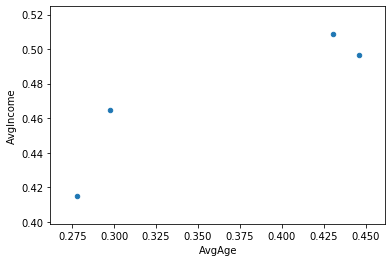

In [83]:
centroids.plot(kind='scatter',x='AvgAge',y='AvgIncome')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

In [56]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_validation = pca.transform(X_validation)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.76000529 0.23999471]


In [45]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
from sklearn.metrics import confusion_matrix, accuracy_score
print ("----------------------> [DecisionTreeClassifier]")
print(confusion_matrix(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

----------------------> [DecisionTreeClassifier]
[[18 12]
 [18 12]]
Accuracy 0.5


In [46]:
#kneighbours
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[14 16]
 [17 13]]
Accuracy 0.45


In [47]:
#Gaussian
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_validation)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))


[[26  4]
 [20 10]]
Accuracy 0.6


In [48]:
#SVC
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_validation)

from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(Y_validation,Y_pred))
print('Accuracy' , accuracy_score(Y_validation, Y_pred))

[[30  0]
 [30  0]]
Accuracy 0.5
